In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [8]:
CSV_FILE = "AAPL_1980-12-03_2025-02-07.csv"  # Update with your CSV file name
SEQUENCE_LENGTH = 60
EPOCHS = 50
BATCH_SIZE = 32

In [10]:
data = pd.read_csv(CSV_FILE, parse_dates=["Date"], index_col="Date")
data = data[['Close']]

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)


In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, SEQUENCE_LENGTH)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [16]:
model = Sequential([
    Input(shape=(SEQUENCE_LENGTH, 1)),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [18]:
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))


Epoch 1/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 9.3772e-05 - val_loss: 0.0010
Epoch 2/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 1.3883e-05 - val_loss: 8.3347e-04
Epoch 3/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 1.1687e-05 - val_loss: 0.0019
Epoch 4/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 1.2896e-05 - val_loss: 0.0012
Epoch 5/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 1.0476e-05 - val_loss: 0.0021
Epoch 6/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 1.3922e-05 - val_loss: 0.0043
Epoch 7/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 1.0769e-05 - val_loss: 6.7941e-04
Epoch 8/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 1.0164e-05 - val_loss: 4.9690e-04
Epoch 9/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 1.0910e-05 - val_loss: 0.0033
Epoch 10/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 9.7119e-06 - val_loss: 0.0011
Epoch 11/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 1.0425e-0

In [20]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))


70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


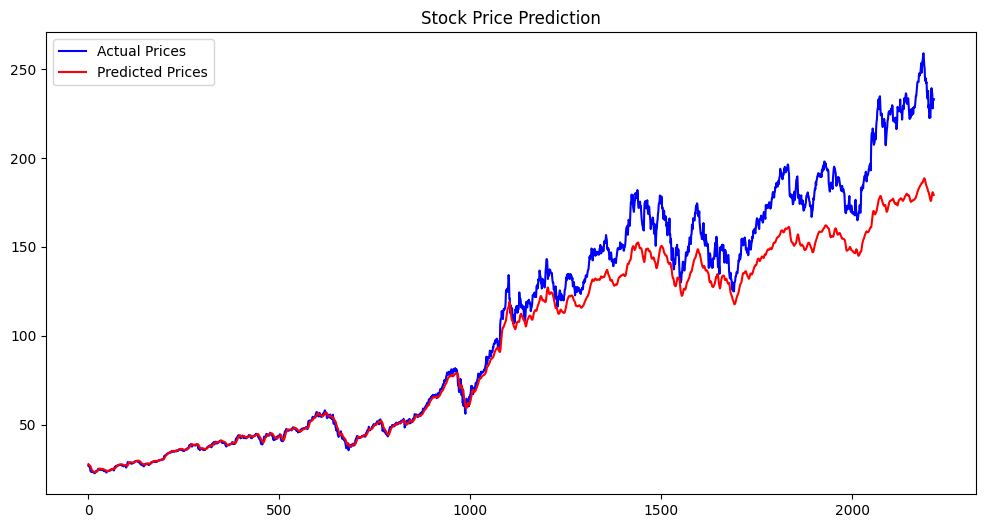

In [22]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Prices", color='blue')
plt.plot(y_pred, label="Predicted Prices", color='red')
plt.legend()
plt.title("Stock Price Prediction")
plt.show()


In [24]:
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 19.70


In [28]:
def predict_future(days):
    last_sequence = scaled_data[-SEQUENCE_LENGTH:].reshape(1, SEQUENCE_LENGTH, 1)
    predictions = []
    
    for _ in range(days):
        pred = model.predict(last_sequence)[0]
        predictions.append(pred)
        last_sequence = np.append(last_sequence[:,1:,:], [[pred]], axis=1)
    
    return scaler.inverse_transform(np.array(predictions).reshape(-1,1))

future_days = 30
future_prices = predict_future(future_days)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

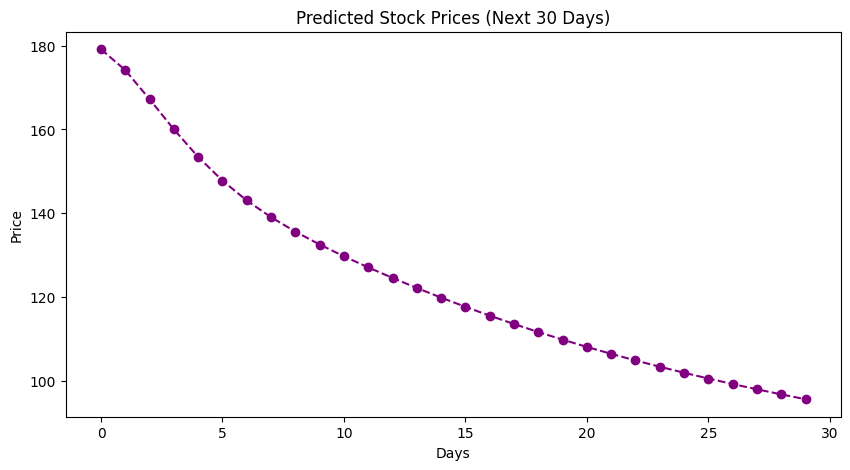

In [30]:
plt.figure(figsize=(10,5))
plt.plot(range(future_days), future_prices, marker='o', linestyle='dashed', color='purple')
plt.title("Predicted Stock Prices (Next 30 Days)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()
